In [1]:
from community_knapsack import *
from evaluation import evaluation

In [2]:
# The algorithms to use for this evaluation:
exact_algorithms = [
    PBSingleAlgorithm.MEMOIZATION,
    PBSingleAlgorithm.DYNAMIC_PROGRAMMING,
    PBSingleAlgorithm.BRANCH_AND_BOUND,
    PBSingleAlgorithm.ILP_SOLVER
]

approximation_algorithms = [
    PBSingleAlgorithm.GREEDY,
    PBSingleAlgorithm.RATIO_GREEDY,
    PBSingleAlgorithm.FPTAS,
    PBSingleAlgorithm.SIMULATED_ANNEALING,
    PBSingleAlgorithm.GENETIC_ALGORITHM
]

In [3]:
# The boundaries of this evaluation:
num_projects = 100

start_num_voters = 2_000
end_num_voters = 100_000
step_num_voters = 2_000

budget = 100_000
cost_bound = (5_000, 50_000)

In [4]:
# Set the global x-axis for this evaluation:
x_axis = list(range(start_num_voters, end_num_voters + 1, step_num_voters))

In [5]:
# Generate the problems using the evaluation tools:
problems = evaluation.generate_single_problems(
    num_project_bounds=[(num_projects, num_projects)],
    num_voters_bounds=[(v, v) for v in x_axis],
    budget_bounds=[(budget, budget)],
    cost_bounds=[cost_bound]
)

In [6]:
# Obtain the exact results for this evaluation:
exact_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=exact_algorithms,
    timeout=120,
    max_fail=-1,
    file_name='ext-changing-voters.json',
    output=True
)

In [7]:
# Obtain the approximation results for this evaluation:
approximation_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=approximation_algorithms,
    timeout=120,
    max_fail=-1,
    file_name='apx-changing-voters.json',
    output=True
)

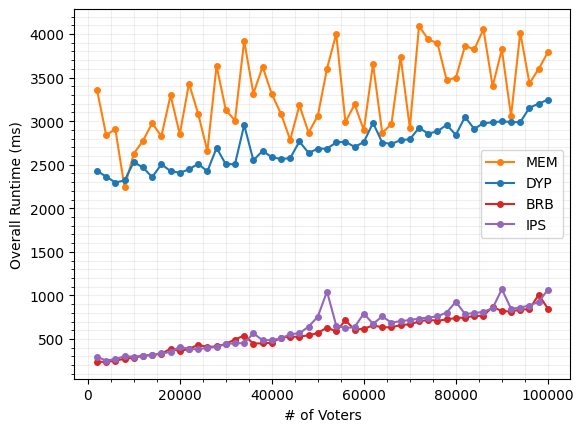

In [8]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 2),
    x_label='# of Voters',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms)
)

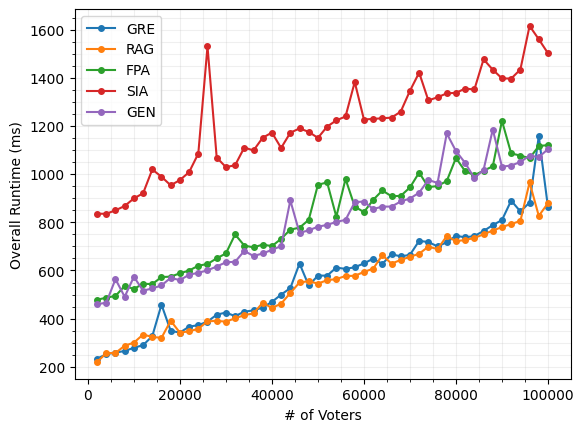

In [9]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=evaluation.get_y_axes(approximation_results, approximation_algorithms, 2),
    x_label='# of Voters',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms)
)

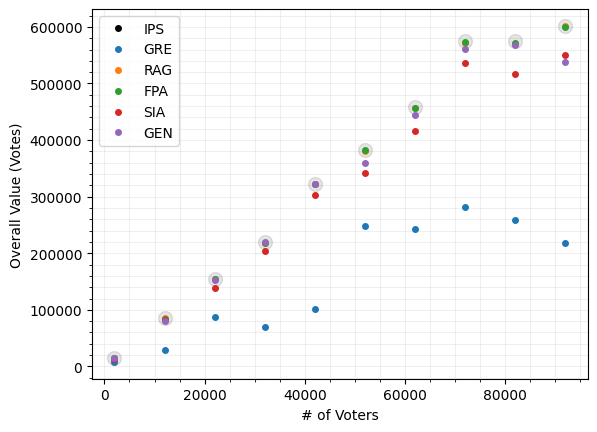

In [12]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=[evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)] + evaluation.get_y_axes(approximation_results, approximation_algorithms, 0),
    filter_x=5,
    x_label='# of Voters',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=['IPS'] + evaluation.get_labels(approximation_algorithms),
    colors=['black'] + evaluation.get_colors(approximation_algorithms),
    alphas=[0.1] + evaluation.get_alphas(approximation_algorithms),
    sizes=[10] + evaluation.get_sizes(approximation_algorithms)
)

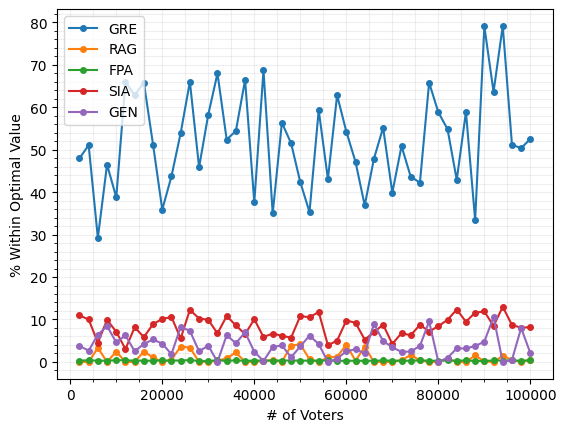

In [13]:
# Plot the approximation % of exact algorithm over the problems:
opt_y = evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)
val_y = evaluation.get_y_axes(approximation_results, approximation_algorithms, 0)

evaluation.plot_2d(
    x_axis=x_axis,
    y_axes=[
        [100 * (1 - (y / opt_y[yid])) for yid, y in enumerate(y_axis)]
        for y_axis in val_y
    ],
    x_label='# of Voters',
    y_label='% Within Optimal Value',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms)
)